<a href="https://colab.research.google.com/github/M-S-ibrahim/ArewaDS-Deep-Learning-/blob/main/Excercise2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Arewa Data Science Academy
## Deep Learning Cohort1.0
### Name: Muhammad Saleh Ibrahim
### Email: Muhseem0@gmail.com
### Title: Week 2 Solution


In [9]:
# Import necessary libraries
import torch
from torch import nn
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor

In [5]:
# Setup device-agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

## 1. Create a straight line dataset using the linear regression formula (`weight * X + bias`).
  * Set `weight=0.3` and `bias=0.9` there should be at least 100 datapoints total.
  * Split the data into 80% training, 20% testing.
  * Plot the training and testing data so it becomes visual.

Your output of the below cell should look something like:
```
Number of X samples: 100
Number of y samples: 100
First 10 X & y samples:
X: tensor([0.0000, 0.0100, 0.0200, 0.0300, 0.0400, 0.0500, 0.0600, 0.0700, 0.0800,
        0.0900])
y: tensor([0.9000, 0.9030, 0.9060, 0.9090, 0.9120, 0.9150, 0.9180, 0.9210, 0.9240,
        0.9270])
```

Of course the numbers in `X` and `y` may be different but ideally they're created using the linear regression formula.

In [6]:
# Create the data parameters
weight = 0.3
bias = 0.9
start = 0
end = 1
step = 0.01


# Make X and y using linear regression feature
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

print(f"Number of X samples: {len(X)}")
print(f"Number of y samples: {len(y)}")
print(f"First 10 X & y samples:\nX: {X[:10]}\ny: {y[:10]}")

Number of X samples: 100
Number of y samples: 100
First 10 X & y samples:
X: tensor([[0.0000],
        [0.0100],
        [0.0200],
        [0.0300],
        [0.0400],
        [0.0500],
        [0.0600],
        [0.0700],
        [0.0800],
        [0.0900]])
y: tensor([[0.9000],
        [0.9030],
        [0.9060],
        [0.9090],
        [0.9120],
        [0.9150],
        [0.9180],
        [0.9210],
        [0.9240],
        [0.9270]])


In [7]:
# Calculate the split index
split_index = int(0.8 * len(X))

# Split the data
X_train, y_train = X[:split_index], y[:split_index]
X_test, y_test = X[split_index:], y[split_index:]

print(f"Number of training samples: {len(X_train)}")
print(f"Number of testing samples: {len(X_test)}")


Number of training samples: 80
Number of testing samples: 20


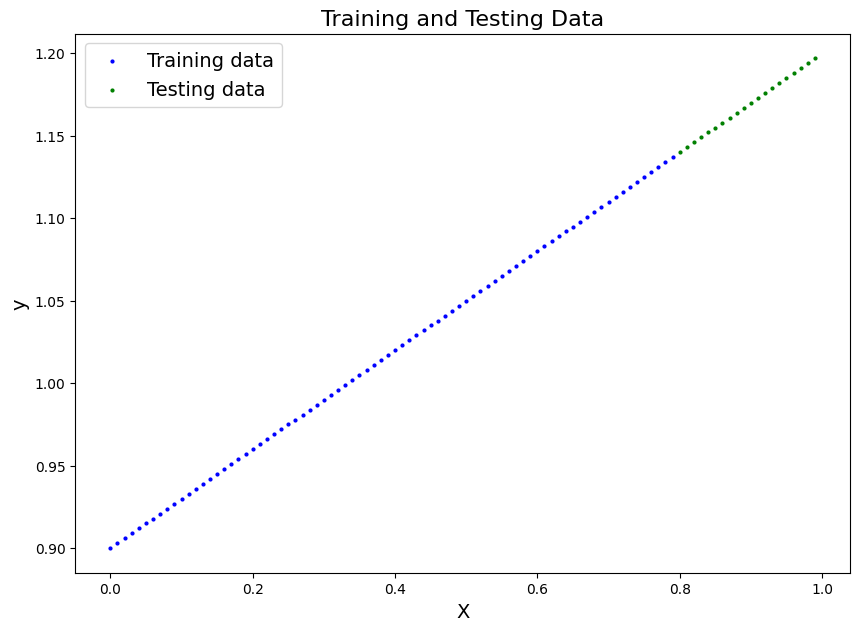

In [10]:
# Plot the training and testing data
plt.figure(figsize=(10, 7))
plt.scatter(X_train, y_train, c="b", s=4, label="Training data")

# Plot the testing data
plt.scatter(X_test, y_test, c="g", s=4, label="Testing data")

# Show the legend
plt.legend(prop={"size": 14})

# Add labels to the axes
plt.xlabel("X", fontsize=14)
plt.ylabel("y", fontsize=14)
plt.title("Training and Testing Data", fontsize=16)
plt.show()

## 2. Build a PyTorch model by subclassing `nn.Module`.
  * Inside should be a randomly initialized `nn.Parameter()` with `requires_grad=True`, one for `weights` and one for `bias`.
  * Implement the `forward()` method to compute the linear regression function you used to create the dataset in 1.
  * Once you've constructed the model, make an instance of it and check its `state_dict()`.
  * **Note:** If you'd like to use `nn.Linear()` instead of `nn.Parameter()` you can.

In [13]:
# Create PyTorch linear regression model by subclassing nn.Module
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        # Use nn.Linear() for simplicity
        self.linear_layer = nn.Linear(in_features=1, out_features=1)

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.linear_layer(x)

In [14]:
# Instantiate the model and put it to the target device

model_0 = LinearRegressionModel()
model_0 = model_0.to(device)

# Print the model's state_dict
print(model_0.state_dict())

OrderedDict([('linear_layer.weight', tensor([[-0.2191]])), ('linear_layer.bias', tensor([0.2018]))])


## 3. Create a loss function and optimizer using `nn.L1Loss()` and `torch.optim.SGD(params, lr)` respectively.
  * Set the learning rate of the optimizer to be 0.01 and the parameters to optimize should be the model parameters from the model you created in 2.
  * Write a training loop to perform the appropriate training steps for 300 epochs.
  * The training loop should test the model on the test dataset every 20 epochs.

In [16]:
# Create the loss function and optimizer

# Create the loss function
loss_fn = nn.L1Loss()

# Create the optimizer
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.01)
# Training loop


In [17]:
# Training loop


# Train model for 300 epochs
epochs = 300

# Send data to target device


for epoch in range(epochs):
  ### Training
  model_0.train()
  # Put model in train mode
  with torch.inference_mode():
    y_pred = model_0(X_train)


  # 1. Forward pass
  y_pred = model_0(X_train)


  # 2. Calculate loss
  loss = loss_fn(y_pred, y_train)

  # 3. Zero gradients
  optimizer.zero_grad()


  # 4. Backpropagation
  loss.backward()


  # 5. Step the optimizer
  optimizer.step()


  ### Perform testing every 20 epochs
  if epoch % 20 == 0:

    # Put model in evaluation mode and setup inference context
      model_0.eval()
      # 1. Forward pass
      with torch.inference_mode():
          test_pred = model_0(X_test)


      # 2. Calculate test loss
      test_loss = loss_fn(test_pred, y_test)

      # Print out what's happening
      print(f"Epoch: {epoch} | Train loss: {loss:.3f} | Test loss: {test_loss:.3f}")

Epoch: 0 | Train loss: 0.903 | Test loss: 1.149
Epoch: 20 | Train loss: 0.672 | Test loss: 0.879
Epoch: 40 | Train loss: 0.441 | Test loss: 0.608
Epoch: 60 | Train loss: 0.210 | Test loss: 0.337
Epoch: 80 | Train loss: 0.044 | Test loss: 0.119
Epoch: 100 | Train loss: 0.033 | Test loss: 0.077
Epoch: 120 | Train loss: 0.026 | Test loss: 0.061
Epoch: 140 | Train loss: 0.019 | Test loss: 0.045
Epoch: 160 | Train loss: 0.012 | Test loss: 0.028
Epoch: 180 | Train loss: 0.006 | Test loss: 0.012
Epoch: 200 | Train loss: 0.006 | Test loss: 0.004
Epoch: 220 | Train loss: 0.006 | Test loss: 0.004
Epoch: 240 | Train loss: 0.006 | Test loss: 0.004
Epoch: 260 | Train loss: 0.006 | Test loss: 0.004
Epoch: 280 | Train loss: 0.006 | Test loss: 0.004


## 4. Make predictions with the trained model on the test data.
  * Visualize these predictions against the original training and testing data (**note:** you may need to make sure the predictions are *not* on the GPU if you want to use non-CUDA-enabled libraries such as matplotlib to plot).

In [18]:
# Make predictions with the model
with torch.inference_mode():
    y_preds = model_0(X_test)

In [19]:
# Plot the predictions (these may need to be on a specific device)
plt.figure(figsize=(10, 7))

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

## 5. Save your trained model's `state_dict()` to file.
  * Create a new instance of your model class you made in 2. and load in the `state_dict()` you just saved to it.
  * Perform predictions on your test data with the loaded model and confirm they match the original model predictions from 4.

In [20]:
from pathlib import Path

# 1. Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path
MODEL_NAME = "01_pytorch_workflow_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(), f=MODEL_SAVE_PATH)


Saving model to: models/01_pytorch_workflow_model_0.pth


In [21]:
# Create new instance of model and load saved state dict (make sure to put it on the target device)
loaded_model_0 = LinearRegressionModel()
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))
loaded_model_0.to(device)

LinearRegressionModel(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

Original model predictions: tensor([[1.1313],
        [1.1342],
        [1.1371],
        [1.1401],
        [1.1430],
        [1.1459],
        [1.1489],
        [1.1518],
        [1.1547],
        [1.1577]])
Loaded model predictions: tensor([[1.1313],
        [1.1342],
        [1.1371],
        [1.1401],
        [1.1430],
        [1.1459],
        [1.1489],
        [1.1518],
        [1.1547],
        [1.1577]])


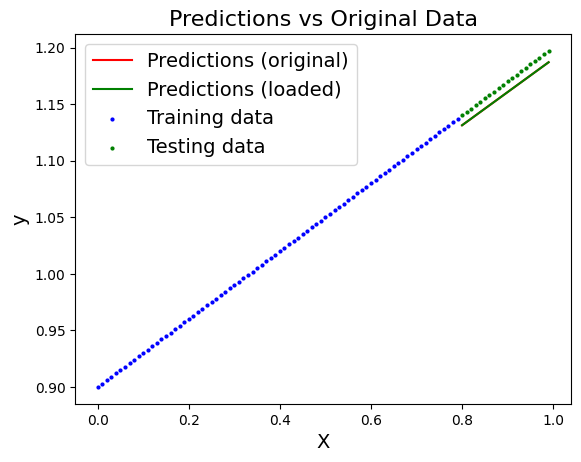

In [23]:
# Create new instance of model and load saved state dict (make sure to put it on the target device)
loaded_model_0 = LinearRegressionModel()
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))
loaded_model_0.to(device)

# Make predictions with the loaded model
with torch.inference_mode():
    loaded_model_preds = loaded_model_0(X_test)

# Compare predictions
print(f"Original model predictions: {y_preds[:10]}")
print(f"Loaded model predictions: {loaded_model_preds[:10]}")

# Plot the predictions of the loaded model
plt.plot(X_test.cpu().numpy(), y_preds.cpu().numpy(), "r-", label="Predictions (original)")
plt.plot(X_test.cpu().numpy(), loaded_model_preds.cpu().numpy(), "g-", label="Predictions (loaded)")

plt.scatter(X_train.cpu(), y_train.cpu(), c="b", s=4, label="Training data")
plt.scatter(X_test.cpu(), y_test.cpu(), c="g", s=4, label="Testing data")
plt.legend(prop={"size": 14})
plt.xlabel("X", fontsize=14)
plt.ylabel("y", fontsize=14)
plt.title("Predictions vs Original Data", fontsize=16)
plt.show()